In [ ]:
import tensorflow as tf

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
from IPython import display
from tensorflow.keras.datasets import mnist

In [ ]:
# fashion_mnist.load_data() :  mnist 데이터를 읽어서 리턴
(X_train, y_train), (_, _) = mnist.load_data()

In [ ]:
#X_train이미지를 조회
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#X_train이미지의 종류를 조회
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

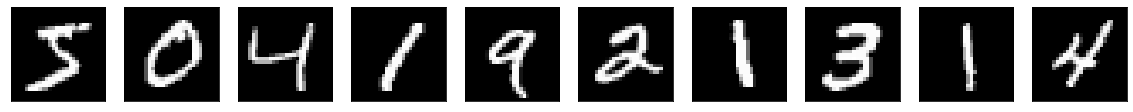

In [ ]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  # 학습 이미지 출력
  plt.imshow(X_train[i])
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)


In [ ]:
# X_train[0] 조회
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#X_train.astype('float32')  :  X_train 이미지를 flat32 타입으로 변환
# 하고 127.5 를 빼줌 (데이터를 -1~1 사이 범위로 변환 하기 위해서: 데이터의 범위가 -1~1 사이일때 생성이 잘 된다고 함)
X_train = X_train.astype('float32') -127.5

In [ ]:
X_train[0]

array([[-127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5],
       [-127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5],
       [-127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5],
       [-127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5, -127.5,
        -127.

In [ ]:
#데이터를 127.5 로 나눠줌 (데이터를 -1~1 사이 범위로 변환 하기 위해서: 데이터의 범위가 -1~1 사이일때 생성이 잘 된다고 함)
X_train = X_train / 127.5

In [ ]:
X_train[0]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [ ]:
# X_train의 shape 조회
# 28줄, 28칸의 이미지 6만개
X_train.shape

(60000, 28, 28)

# 생성자 구현

In [ ]:
# 진짜 같은 가짜 이미지를 생성할 생성자 객체 생성
generator = tf.keras.Sequential()

In [ ]:
# 28*28 개의 데이터를 입력 받아서 128번의 선형 회귀실행
generator.add(layers.Dense(128, input_dim=28 * 28))

In [ ]:
# Leaky ReLU 활성 함수 실행
generator.add(layers.LeakyReLU(alpha=0.01))

In [ ]:
# 28*28번 선형 회귀 실행
# 출력할 데이터의 범위가 -1~1 사이 (Gan에서 -1~1사이 데이터 일때 생성이 잘 된다고 함) 로 하기위해서 tanh 활성 함수 사용
generator.add(layers.Dense(28 * 28 , activation='tanh'))

In [ ]:
# 선형회귀 결과를  28줄 28칸  이미지로 변환
generator.add(layers.Reshape((28,28)))

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


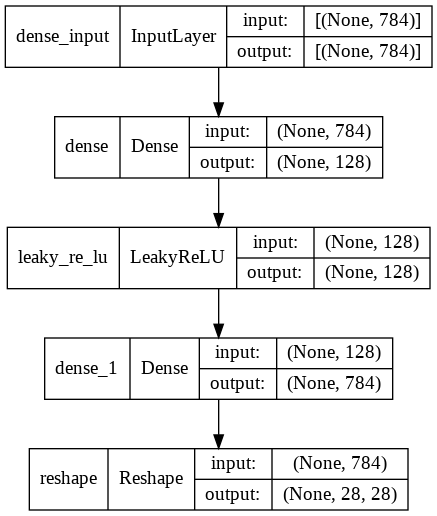

In [ ]:
from tensorflow.keras.utils  import plot_model
plot_model(generator, show_shapes=True)

In [ ]:
# random한 값을 가진 28줄 28칸 이미지 1개 생성
new_image = tf.random.normal([1, 28 * 28])

In [ ]:
new_image

<tf.Tensor: shape=(1, 784), dtype=float32, numpy=
array([[-1.06134593e+00,  8.57409954e-01,  1.07570910e+00,
        -3.02618176e-01, -7.02238262e-01,  6.03591561e-01,
        -1.35990763e+00, -4.99481082e-01, -1.17227530e+00,
         6.01388335e-01,  1.32394874e+00,  7.54826427e-01,
        -4.78722334e-01,  6.95472419e-01, -8.76579583e-01,
        -5.86156547e-01, -7.76256025e-01,  1.62410438e+00,
        -2.41928577e-01, -1.21081018e+00,  7.96170831e-01,
        -9.48329568e-01, -1.68805957e-01, -2.60095466e-02,
         1.75516021e+00, -6.39633417e-01, -2.85486650e+00,
         9.50135887e-01,  2.29081202e+00, -1.75043857e+00,
         8.45349550e-01,  5.53646088e-01,  2.02657747e+00,
        -1.02248430e+00, -9.88647997e-01,  2.53229809e+00,
         1.67835414e+00,  7.30014682e-01, -1.83310091e+00,
         3.20051759e-01, -9.43537712e-01, -1.92927301e-01,
        -1.86313105e+00,  2.24135423e+00,  9.77796078e-01,
        -3.53540123e-01,  1.30967760e+00, -6.08215868e-01,
      

In [ ]:
new_image.shape

TensorShape([1, 784])

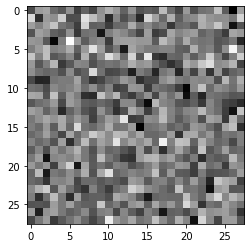

In [ ]:
plt.imshow(tf.reshape(new_image[0], (28,28)) )

In [ ]:
# new_image를 입력으로 진짜 같은 가짜 이미지 생성 (학습이 아직 않되서 진짜 같지는 않음)
generated_image = generator(new_image, training=False)

In [ ]:
generated_image

<tf.Tensor: shape=(1, 28, 28), dtype=float32, numpy=
array([[[ 6.87484980e-01,  1.12403139e-01,  1.70888938e-02,
         -1.74647681e-02, -8.24562073e-01,  4.70581084e-01,
         -3.17575306e-01,  1.30463973e-01,  6.71697140e-01,
         -5.51559925e-01, -3.79916996e-01,  2.38603316e-02,
         -4.35958087e-01,  4.33848262e-01, -1.01590984e-01,
          6.59373105e-01,  1.96369261e-01, -1.69138670e-01,
          1.06948242e-01,  2.72484124e-02,  3.32046658e-01,
         -5.75558282e-02,  6.07571781e-01,  3.83238226e-01,
          1.66998766e-02, -7.09151924e-01, -1.99263439e-01,
         -6.30557060e-01],
        [-2.18596458e-02,  1.68058738e-01, -5.21560647e-02,
         -5.59264779e-01,  3.64543766e-01,  7.63216436e-01,
         -1.21832371e-01,  4.96757954e-01,  1.77582413e-01,
          5.88002801e-01,  3.89295489e-01, -1.38926413e-03,
         -7.27497280e-01, -4.50850070e-01, -2.62100726e-01,
         -6.35028422e-01,  9.79975462e-02,  4.68268812e-01,
         -2.94248223

In [ ]:
generated_image.shape

TensorShape([1, 28, 28])

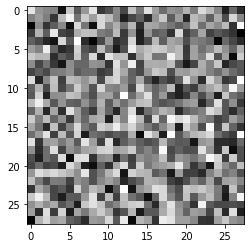

In [ ]:
# 생성한 이미지 출력(진짜 같은 이미지를 생성하는게 목표, 학습전이라 아직 진짜 같지는 않음)
plt.imshow(tf.reshape(generated_image[0], (28, 28)))

# 판별자

In [ ]:
# 가짜 이미지는 0 진짜 이미지는 1로 판별하는 판별자 생성
discriminator = tf.keras.Sequential()

In [ ]:
# 28줄 28칸의 이미지를 입력 받아서 1차원 배열로 변환
discriminator.add(layers.Flatten(input_shape=(28,28)))

In [ ]:
# 128번 선형 회귀
discriminator.add(layers.Dense(128))

In [ ]:
# Leaky ReLU 활성화 함수 사용
discriminator.add(layers.LeakyReLU(alpha=0.01))

In [ ]:
# 1번의 선형 회귀를 해서 가짜 이미지는 0 진짜 이미지는 1로 판별
discriminator.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


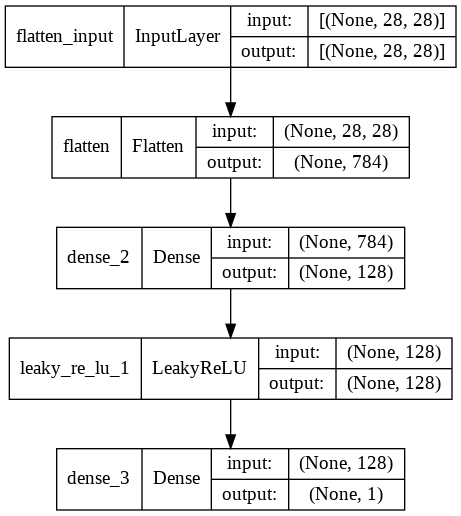

In [ ]:
from tensorflow.keras.utils  import plot_model
plot_model(discriminator, show_shapes=True)

In [ ]:
# 생성한 가짜 이미지 (generated_image) 를 진짜이미지 인지 생성한 가짜 이미지인지 판별
# 진짜 이미지 1, 가짜 이미지 0
decision = discriminator(generated_image)

In [ ]:
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.38514927]], dtype=float32)>

In [ ]:
# 진짜 이미지 0 가짜 이미지 1 
# 2가지로 분류할떼 loss를 계산할 객체 생성

cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [ ]:
# 생성자 옵티마이져 객체
generator_optimizer = tf.keras.optimizers.Adam(1e-3)

In [ ]:
# 판별자 옵티 마이져 객체
discriminator_optimizer = tf.keras.optimizers.Adam(1e-3)

In [ ]:
# 반복 횟수
EPOCHS = 200

In [ ]:
# 입력 이미지의 데이터 수 (28줄 29칸)
noise_dim = 28 * 28

In [ ]:
# 입력 이미지 개수 (16개의 가짜 이미지 생성)
num_examples_to_generate = 16

In [ ]:
# 생성 모델의 입력으로 진짜 같은 가짜 이미지를 만들 입력 생성
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# 전체 진짜 이미지 개수
BUFFER_SIZE = 60000

In [ ]:
# 한번에 학습할 진짜 이미지 개수
# 256개 이미지씩 판별자 학습 할것임
# 진짜 이미지를 입력 받은 판별자는 1 로 판별 해야함
BATCH_SIZE = 256

In [ ]:
# tf.data.Dataset.from_tensor_slices(X_train)) : X_train을 BATCH_SIZE 개씩 리턴할 Dataset 객체 생성
# shuffle(BUFFER_SIZE) : X_train 의 데이터 BUFFFER_SIZE 개를 섞음
# batch(BATCH_SIZE) : 학습할때 한번에 BATCH_SIZE (256) 개의 데이터씩 리턴
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

epoch =  0
[D real_loss:0.006401,fake_loss :0.036657] [G loss:6.383379]


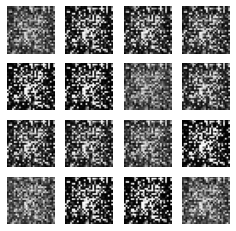

epoch =  19
[D real_loss:0.630704,fake_loss :0.501550] [G loss:1.889255]


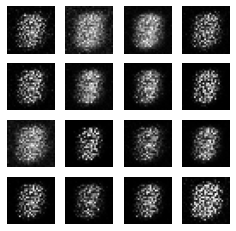

epoch =  39
[D real_loss:0.472450,fake_loss :1.001033] [G loss:1.148382]


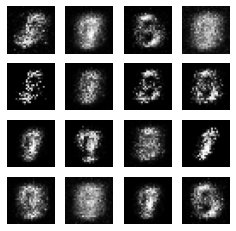

epoch =  59
[D real_loss:0.358324,fake_loss :0.710577] [G loss:1.456526]


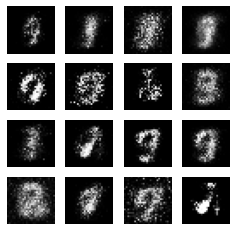

epoch =  79
[D real_loss:0.614824,fake_loss :0.533396] [G loss:1.680277]


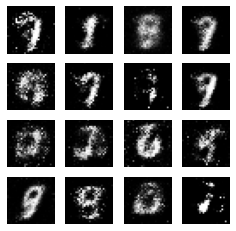

epoch =  99
[D real_loss:0.541672,fake_loss :0.675060] [G loss:1.509248]


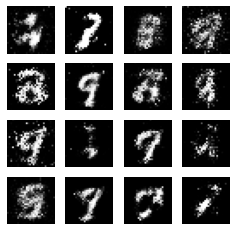

epoch =  119
[D real_loss:0.421243,fake_loss :0.421342] [G loss:1.793304]


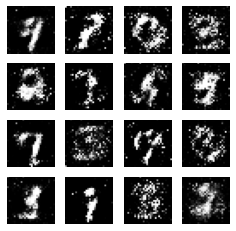

epoch =  139
[D real_loss:0.362605,fake_loss :0.437969] [G loss:1.733132]


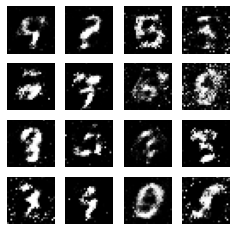

epoch =  159
[D real_loss:0.782337,fake_loss :0.376958] [G loss:2.030563]


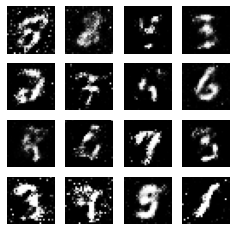

epoch =  179
[D real_loss:0.329494,fake_loss :0.426774] [G loss:1.899513]


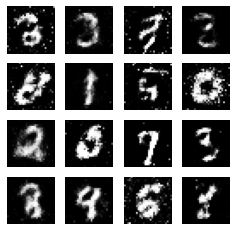

epoch =  199
[D real_loss:0.414615,fake_loss :0.350931] [G loss:2.145319]


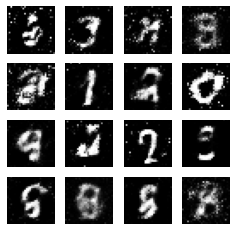

In [ ]:
for epoch in range(EPOCHS):
  # train_dataset이 256개씩 X_train 이미지를 리턴해서 image_batch에 저장
  for image_batch in train_dataset:
    # batch_size개의 28줄 28칸의 랜덤함 값의 이미지를 생성
    # 이 이미지를 입력으로 생성 모델이 진짜같은 이미지를 생성할 것임  
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      #noise를 입력으로 진짜 같은 이미지 생성
      generated_images = generator(noise, training=True)
      # 진짜 이미지 image_batch를 dicriminator가 판별 
      # 진짜 1 가짜 0으로 판별 
      real_output = discriminator(image_batch, training=True)
      # 가짜 이미지 generated_image를 dicriminator가 판별 
      # 진짜 1 가짜 0으로 판별
      fake_output = discriminator(generated_images, training=True)

      #생성자의 cost (loss)
      # tf.ones_like(fake_output) : 가짜 이미지 fake_output 개수만큼 1이 저장된배열생성  
      
      # cross_entropy(a,b) : a와 b가 다른 비율 계산
      
      # a는 tf.ones_like(fake_output)
      # b는 fake_output (가짜 이미지 판별 결과 가짜 0 진짜 1)
      # 이므로 generator_loss는 판별자가 가짜 이미지를 모두 진짜로 판별하면 0
      # 가짜 이미지를 모두 가짜로 올바르게 판별하면 무한대
      
      # 딥러닝은 loss가 작아지게 학습하기 때문에 판별자가 가짜 이미지를 진짜로 판별하도록
      # 생성자는 진짜 같은 이미지를 생성하도록 학습됨
      generator_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        
      
      # 판별자의 cost (loss)
      #f.ones_like(real_output) : 진짜 이미지 real_output 개수만큼 1이 저장된배열생성 
      # cross_entropy(a,b) : a와 b가 다른 비율 계산
      
      # a는 tf.one_like(real_output)
      # b는 real_output (진짜 이미지 판별 결과 가짜라고 생각되면 0 진짜 1)
      # 이므로 real_loss는 판별자가 진짜 이미지를 모두 진짜 1로 판별하면 0
      # 진짜 이미지를 모두 가짜로 잘못 판별하면 무한대
      
      # 딥러닝은 loss가 작아지게 학습하기 때문에 판별자가 진짜 이미지를 진짜로 판별하도록
      # 판별자는 학습됨
      real_loss = cross_entropy(tf.ones_like(real_output), real_output)
      
      #f.zero_like(fake_output) : 가짜 이미지 fake_output 개수만큼 0이 저장된배열생성 
      # cross_entropy(a,b) : a와 b가 다른 비율 계산
      
      # a는 tf.zero_like(fake_output)
      # b는 fake_output (가짜 이미지 판별 결과 가짜라고 생각되면 0 진짜 1)
      # 이므로 fake_loss는 판별자가 가짜 이미지를 모두 가짜 0으로 판별하면 0
      # 가짜 이미지를 모두 진짜로 잘못 판별하면 무한대
      
      # 딥러닝은 loss가 작아지게 학습하기 때문에 판별자가 가짜 이미지를 가짜로 판별하도록
      # 판별자는 학습됨
      fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
      #real_loss (진짜를 진짜로 판별한 비율)+ fake_loss (가짜를 가짜로 판별한 비율)
      discriminator_loss = real_loss + fake_loss

    # 생성자 기울기 계산
    gradients_of_generator = gen_tape.gradient(generator_loss, generator.trainable_variables)
    # 판별자 기울기 계산
    gradients_of_discriminator = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)
    
    #생성자 업데이트
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    # 판별자 업데이트
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



  # 20 에포크가 지날 때마다 출력.
  if (epoch == 0) or ( (epoch + 1) % 20 == 0) :
    print("="*100)
    print("epoch = ", epoch)
    #real_loss : 진짜를 진짜로 올바르게 판별한 비율
    #fake_loss : 가짜를 가짜로 올바르게 판별한 비율
    # generator_loss : 판별자를 속인 비율
    print("[D real_loss:%f,fake_loss :%f] [G loss:%f]"%(real_loss, fake_loss, generator_loss))
    
    #seed를 입력으로 가짜 이미지 16개 생성해서 predictions에 저장
    predictions = generator(seed, training=False)
    #4줄 4칸
    fig = plt.figure(figsize=(4,4))
    # predictions의 줄수 16번 반복
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        # i번째 가짜 이미지 출력
        plt.imshow(predictions[i, :, :] * 127.5 + 127.5, cmap='gray')
        #x y축 출력 않함
        plt.axis('off')

    plt.show()
  
